# 6-1. 프로젝트: 인물 모드 문제점 찾기

### Step 1. 인물모드 직접 해 보기

In [1]:
# importlib: 사용자가 파이썬의 import 시스템과 상호작용하기 위한 API를 제공하는 내장 라이브러리
# 사용자는 import 함수의 구현 내용과, 실행에 필요한 하위 함수들을 이용해 필요에 맞는 임포터를 직접 구현하거나 임포트 관련 기능들을 자유롭게 사용할 수 있음
# importlib.metadata: 설치된 패키지 메타 데이터에 대한 접근을 제공하는 라이브러리.
# 해당 코드 블럭에서는 importlib.metadata 안에 있는 version() 함수를 이용하여 pixellib 라이브러리의 버전을 확인

# os: Operating System의 줄임말로, 운영체제에서 제공되는 여러 기능을 파이썬에서 사용할 수 있도록 함 (Ex. 디렉토리 경로 이동, 시스템 환경 변수 가져오기 등)
# urllib: URL 작업을 위한 여러 모듈을 모은 패키지. (Ex. urllib.request, urllib.parse, ...)
# cv2: OpenCV 라이브러리로, 실시간 컴퓨터 비전을 목적으로 한 프로그래밍 라이브러리
# numpy(NumPy): 행렬이나 대규모 다차원 배열을 쉽게 처리할 수 있도록 지원하는 라이브러리. 데이터 구조 외에도 수치 계산을 위해 효율적으로 구현된 기능을 제공
# pixellib: 이미지 및 비디오 segmentation을 수행하기 위한 라이브러리. 
# pixellib.semantic: segmentation 기법 중, semantic segmentation을 쉽게 사용할 수 있도록 만든 라이브러리
# matplotlib: 파이썬 프로그래밍 언어 및 수학적 확장 NumPy 라이브러리를 활용한 플로팅 라이브러리로, 데이터 시각화 도구

import os
import urllib
import cv2
import numpy as np
from pixellib.semantic import semantic_segmentation
import pixellib
from matplotlib import pyplot as plt
from importlib.metadata import version

print(cv2.__version__)
print(version('pixellib'))

Matplotlib is building the font cache; this may take a moment.


4.5.3
0.7.1


(675, 540, 3)


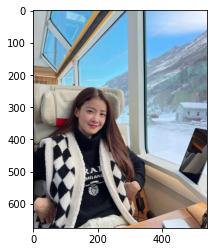

In [2]:
# os 모듈에 있는 getenv() 함수를 이용하여 읽고싶은 파일의 경로를 file_path에 저장
# 준비한 이미지 파일의 경로를 이용하여, 이미지 파일을 읽음
# cv2.imread(경로): 경로에 해당하는 이미지 파일을 읽어서 변수에 저장
img_path_01 = os.getenv('HOME')+'/aiffel/human_segmentation/images/person_train.jpg'  
img_orig_01 = cv2.imread(img_path_01) 

print(img_orig_01.shape)

# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 이미지 색상 채널을 변경 (BGR 형식을 RGB 형식으로 변경)
# plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시, 입력은 RGB(A) 데이터 혹은 2D 스칼라 데이터
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html
# plt.show(): 현재 열려있는 모든 figure를 표시 (여기서 figure는 이미지, 그래프 등)
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.show.html
plt.imshow(cv2.cvtColor(img_orig_01, cv2.COLOR_BGR2RGB))
plt.show()

In [3]:
# 저장할 파일 이름을 결정합니다
# 1. os.getenv(x)함수는 환경 변수x의 값을 포함하는 문자열 변수를 반환합니다. model_dir 에 "/aiffel/human_segmentation/models" 저장
# 2. #os.path.join(a, b)는 경로를 병합하여 새 경로 생성 model_file 에 "/aiffel/aiffel/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5" 저장
# 1
model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models' 
# 2
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5') 

# PixelLib가 제공하는 모델의 url입니다
model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5' 

# 다운로드를 시작합니다
urllib.request.urlretrieve(model_url, model_file) # urllib 패키지 내에 있는 request 모듈의 urlretrieve 함수를 이용해서 model_url에 있는 파일을 다운로드 해서 model_file 파일명으로 저장

('/aiffel/aiffel/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5',
 <http.client.HTTPMessage at 0x78763741d070>)

In [4]:
model = semantic_segmentation() #PixelLib 라이브러리 에서 가져온 클래스를 가져와서 semantic segmentation을 수행하는 클래스 인스턴스를 만듬
model.load_pascalvoc_model(model_file) # pascal voc에 대해 훈련된 예외 모델(model_file)을 로드하는 함수를 호출

In [5]:
segvalues, output = model.segmentAsPascalvoc(img_path_01) # segmentAsPascalvoc()함 수 를 호출 하여 입력된 이미지를 분할, 분할 출력의 배열을 가져옴, 분할 은 pacalvoc 데이터로 학습된 모델을 이용

In [6]:
#pascalvoc 데이터의 라벨종류
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
len(LABEL_NAMES)

21

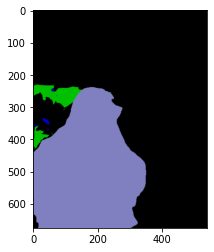

In [7]:
#segmentAsPascalvoc() 함수 를 호출하여 입력된 이미지를 분할한 뒤 나온 결과값 중 output을 matplotlib을 이용해 출력
plt.imshow(output)
plt.show()

In [8]:
segvalues # segmentAsPascalvoc() 함수를 호출하여 입력된 이미지를 분할한 뒤 나온 결과값 중 배열값을 출력

{'class_ids': array([ 0,  9, 15, 18]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]])}

In [9]:
#segvalues에 있는 class_ids를 담겨있는 값을 통해 pacalvoc에 담겨있는 라벨을 출력
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
chair
person
sofa


In [10]:
# 아래 코드를 이해하지 않아도 좋습니다
# PixelLib에서 그대로 가져온 코드입니다
# 주목해야 할 것은 생상 코드 결과물이예요!

#컬러맵 만들기 
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20] #생성한 20개의 컬러맵 출력

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [11]:
colormap[15] #컬러맵 15에 해당하는 배열 출력 (pacalvoc에 LABEL_NAMES 15번째인 사람)

array([192, 128, 128])

In [12]:
seg_color = (128,128,192) # 색상순서 변경 - colormap의 배열은 RGB 순이며 output의 배열은 BGR 순서로 채널 배치가 되어 있어서

(675, 540)


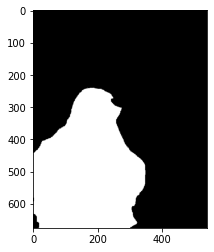

In [14]:
# output의 픽셀 별로 색상이 seg_color와 같다면 1(True), 다르다면 0(False)이 됩니다
# seg_color 값이 person을 값이 므로 사람이 있는 위치를 제외하고는 gray로 출력
# cmap 값을 변경하면 다른 색상으로 확인이 가능함
seg_map = np.all(output==seg_color, axis=-1) 
print(seg_map.shape) 
plt.imshow(seg_map, cmap='gray')
plt.show()

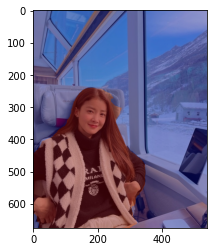

In [15]:
# 원본이미지를 img_show에 할당한뒤 이미지 사람이 있는 위치와 배경을 분리해서 표현한 color_mask 를 만든뒤 두 이미지를 합쳐서 출력
img_show_01 = img_orig_01.copy()

# True과 False인 값을 각각 255과 0으로 바꿔줍니다
img_mask_01 = seg_map.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 바꿔봅니다
color_mask_01 = cv2.applyColorMap(img_mask_01, cv2.COLORMAP_JET)

# 원본 이미지와 마스트를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.
img_show_01 = cv2.addWeighted(img_show_01, 0.6, color_mask_01, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show_01, cv2.COLOR_BGR2RGB))
plt.show()

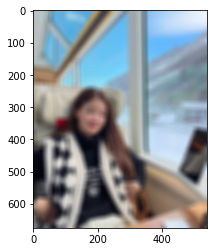

In [16]:
# (13,13)은 blurring kernel size를 뜻합니다
# 다양하게 바꿔보세요
img_orig_blur_01 = cv2.blur(img_orig_01, (20,20))

# plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시한다.
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경)   
plt.imshow(cv2.cvtColor(img_orig_blur_01, cv2.COLOR_BGR2RGB))
plt.show()

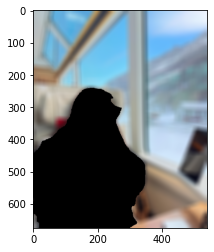

In [17]:
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경) 
img_mask_color_01 = cv2.cvtColor(img_mask_01, cv2.COLOR_GRAY2BGR)

# cv2.bitwise_not(): 이미지가 반전됩니다. 배경이 0 사람이 255 였으나
# 연산을 하고 나면 배경은 255 사람은 0입니다.
img_bg_mask_01 = cv2.bitwise_not(img_mask_color_01)

# cv2.bitwise_and()을 사용하면 배경만 있는 영상을 얻을 수 있습니다.
# 0과 어떤 수를 bitwise_and 연산을 해도 0이 되기 때문에 
# 사람이 0인 경우에는 사람이 있던 모든 픽셀이 0이 됩니다. 결국 사람이 사라지고 배경만 남아요!
img_bg_blur_01 = cv2.bitwise_and(img_orig_blur_01, img_bg_mask_01)
plt.imshow(cv2.cvtColor(img_bg_blur_01, cv2.COLOR_BGR2RGB))
plt.show()

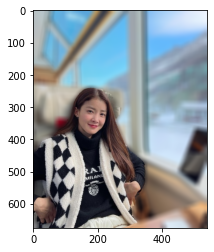

In [18]:
# np.where(조건, 참일때, 거짓일때)
# 세그멘테이션 마스크가 255인 부분만 원본 이미지 값을 가지고 오고 
# 아닌 영역은 블러된 이미지 값을 사용합니다.
img_concat_01 = np.where(img_mask_color_01==255, img_orig_01, img_bg_blur_01)
# plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시한다.
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니 
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경)
plt.imshow(cv2.cvtColor(img_concat_01, cv2.COLOR_BGR2RGB))
plt.show()


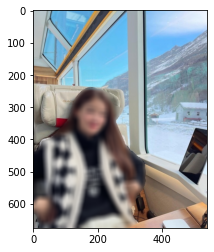

In [19]:
# Q. 이번에는 사람 부분을 블러로, 배경 부분을 원본으로 출력해볼까요?
# 힌트 : img_mask_color 옵션을 적절히 조정해주고, img_orig, img_orig_blur 를 활용하세요.
img_concat_01_reverse = np.where(img_bg_mask_01==255, img_orig_01, img_orig_blur_01)
plt.imshow(cv2.cvtColor(img_concat_01_reverse, cv2.COLOR_BGR2RGB))
plt.show()

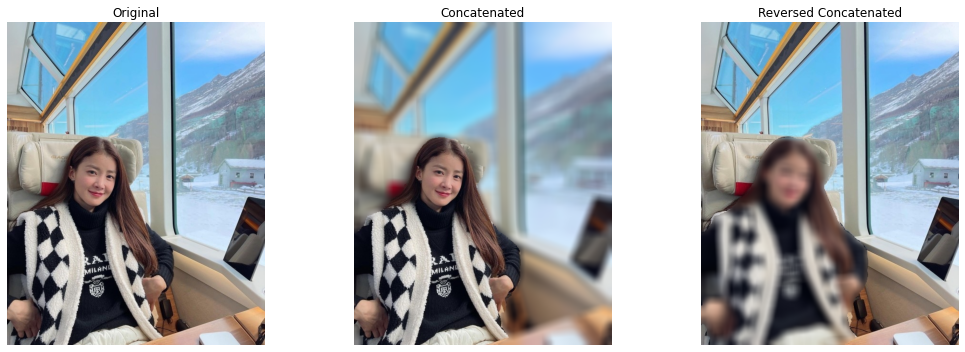

In [20]:
# 이미지 3개를 나란히 배치
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1행 3열, 가로 크기 넉넉히

# 원본 이미지
axes[0].imshow(cv2.cvtColor(img_orig_01, cv2.COLOR_BGR2RGB))
axes[0].set_title('Original')
axes[0].axis('off')

# 합쳐진 이미지
axes[1].imshow(cv2.cvtColor(img_concat_01, cv2.COLOR_BGR2RGB))
axes[1].set_title('Concatenated')
axes[1].axis('off')

# 역순 합쳐진 이미지
axes[2].imshow(cv2.cvtColor(img_concat_01_reverse, cv2.COLOR_BGR2RGB))
axes[2].set_title('Reversed Concatenated')
axes[2].axis('off')

plt.tight_layout()
plt.show()

### Step 2. 사진에서 문제점 찾기

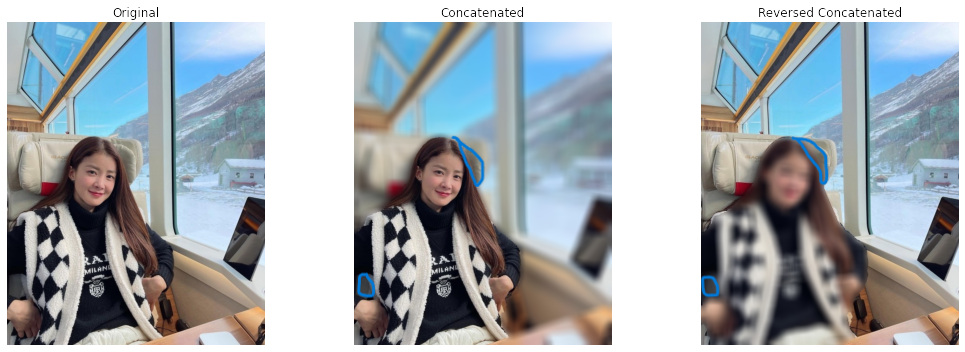
기차의자의 헤드 부분과 팔과 옆구리 사이의 공간이 person으로 인식되었음

### Step 3. 해결 방법을 제안해 보기

##### 해결 방법 조사

1. 더 정밀한 세그멘테이션 모델 사용
: 고해상도 또는 세부 묘사에 강한 모델
- SegFormer: 효율적이면서도 세부 묘사에 강함
- Mask2Former: instance + semantic segmentation 모두 가능
- SAM (Segment Anything Model): Zero-shot 기반으로 다양한 객체 분리 가능, 특히 SAM + refinement (후처리) 조합이 요즘 인물사진에서 매우 많이 활용
- MODNet: 가볍고 정확한 인물 배경 제거 모델로, 머리카락까지 부드럽게 분리해주는 Soft matting 특화 딥러닝 모델


2. 후처리(Refinement) 기법 적용
: DeepLab 출력 후에 경계선을 부드럽게 만드는 작업도 중요
- CRF (Conditional Random Field): 경계를 더 정밀하게 정제
  - pydensecrf 라이브러리 활용 가능
- Morphological operation (OpenCV 사용):
  - erosion, dilation으로 경계 보정
- Edge-aware smoothing: 경계 기반 블러 보정


3. 이미지 전처리 및 후처리 전략 개선
- 입력 이미지를 고해상도(512×512 이상)로 유지
- DeepLab 결과를 마스크로 사용할 때, alpha blending 방식으로 자연스럽게 블러 적용
- 아웃포커싱 시에는 마스크의 soft edge가 중요(binary mask 대신 soft mask 사용)

4. Data Augmentation + Fine-tuning
- Hair, hand, edge 강화 이미지로 추가 학습
- ADE20K 또는 Human Parsing 데이터셋으로 fine-tuning

##### 시도한 방법

SAM, MODNet으로 모델 변경 시도하였으나 모델을 불러오거나 실행시도할 때마다 LMS 커널이 끊어져서 결과를 도출해내지는 못하였고,
아웃포커싱할 때 마스크의 soft edge를 변경해 보았으나 결과물에는 큰 차이가 없었음.

- 원본, 첫번째 시도(binary mask), 두번째 시도(soft mask)
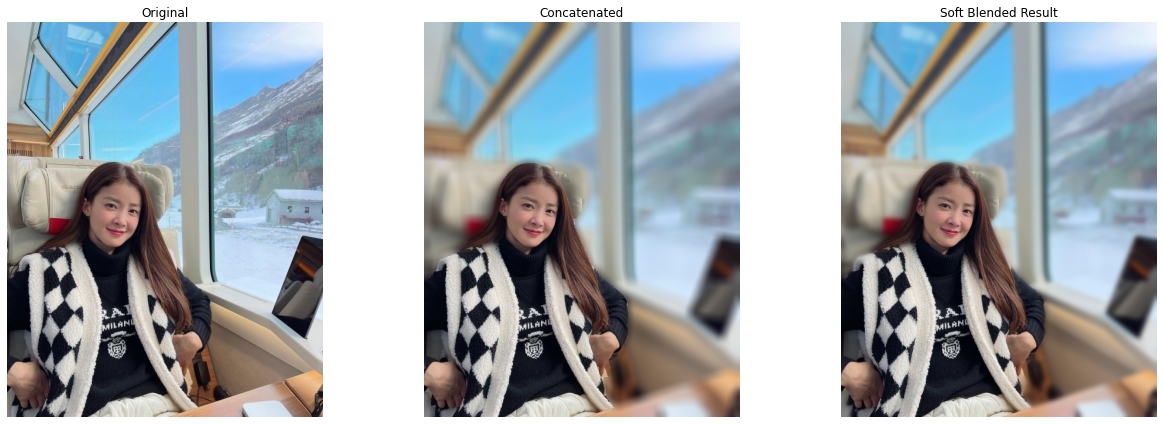
-
-

- 원본, 첫번째 시도(binary mask)의 마스크, 두번째 시도(soft mask)의 마스크
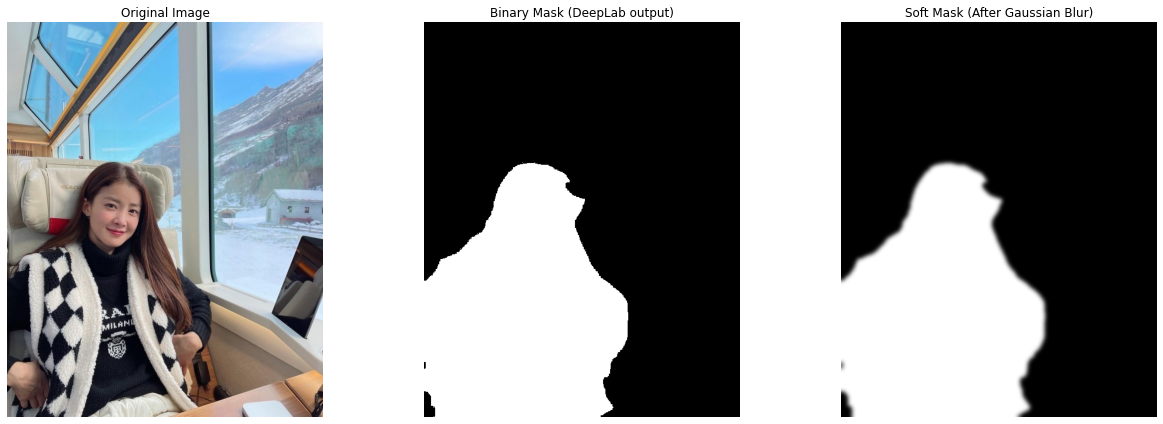


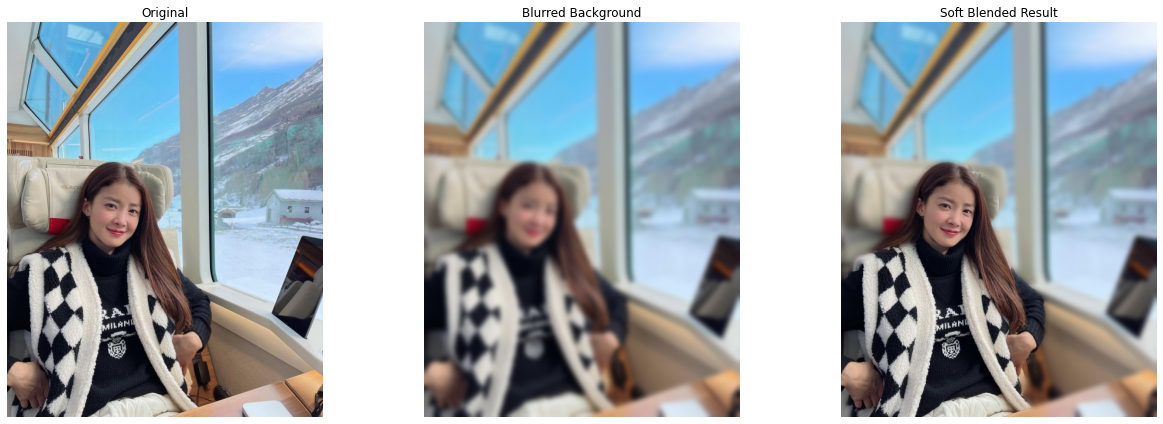

In [21]:
# ==================== [1] 이미지 로딩 ====================
img_path_01_perpost = os.getenv('HOME') + '/aiffel/human_segmentation/images/person_train.jpg'
img_orig_01_perpost = cv2.imread(img_path_01_perpost)

# ==================== [2] 모델 다운로드 및 로딩 ====================
model_dir = os.getenv('HOME') + '/aiffel/human_segmentation/models'
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5')
model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5'

if not os.path.exists(model_file):
    urllib.request.urlretrieve(model_url, model_file)

model = semantic_segmentation()
model.load_pascalvoc_model(model_file)

# ==================== [3] 세그멘테이션 수행 ====================
segvalues, output = model.segmentAsPascalvoc(img_path_01_perpost)

# ==================== [4] 마스크 처리 ====================
# PASCAL VOC 'person' 클래스 색상
seg_color = (128,128,192)
seg_map = np.all(output == seg_color, axis=-1)

# Binary mask
img_mask_01_perpost = seg_map.astype(np.uint8) * 255

# Soft mask 만들기
img_mask_float = img_mask_01_perpost.astype(np.float32) / 255.0
img_mask_blur = cv2.GaussianBlur(img_mask_float, (21, 21), 0)  # 커널 크기 키우면 더 부드러워짐
img_mask_blur = np.expand_dims(img_mask_blur, axis=-1)

# ==================== [5] 이미지 전처리 (세그멘테이션 이후) ====================
# 배경용으로만 사용할 블러 처리
img_orig_blur_01_perpost = cv2.GaussianBlur(img_orig_01_perpost, (25,25), 0)

# float32로 변환 후 블렌딩
foreground = img_orig_01_perpost.astype(np.float32)
background = img_orig_blur_01_perpost.astype(np.float32)

# Soft blending
img_concat_smooth = foreground * img_mask_blur + background * (1 - img_mask_blur)
img_concat_smooth = img_concat_smooth.astype(np.uint8)

# ==================== [6] 결과 시각화 ====================
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].imshow(cv2.cvtColor(img_orig_01_perpost, cv2.COLOR_BGR2RGB))
axes[0].set_title('Original')
axes[0].axis('off')

axes[1].imshow(cv2.cvtColor(img_orig_blur_01_perpost, cv2.COLOR_BGR2RGB))
axes[1].set_title('Blurred Background')
axes[1].axis('off')

axes[2].imshow(cv2.cvtColor(img_concat_smooth, cv2.COLOR_BGR2RGB))
axes[2].set_title('Soft Blended Result')
axes[2].axis('off')

plt.tight_layout()
plt.show()


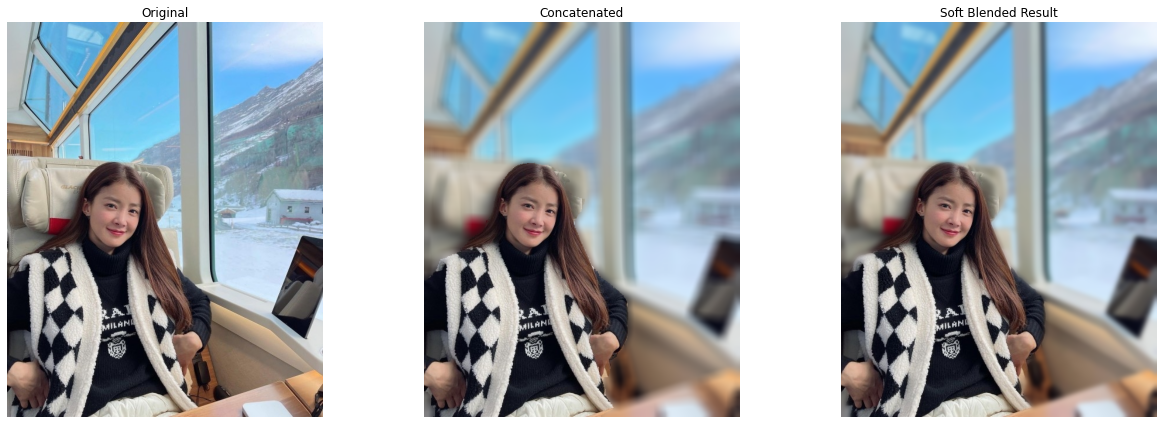

In [24]:
# ==================== [6] 결과 시각화 ====================
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].imshow(cv2.cvtColor(img_orig_01_perpost, cv2.COLOR_BGR2RGB))
axes[0].set_title('Original')
axes[0].axis('off')

# 합쳐진 이미지
axes[1].imshow(cv2.cvtColor(img_concat_01, cv2.COLOR_BGR2RGB))
axes[1].set_title('Concatenated')
axes[1].axis('off')


axes[2].imshow(cv2.cvtColor(img_concat_smooth, cv2.COLOR_BGR2RGB))
axes[2].set_title('Soft Blended Result')
axes[2].axis('off')

plt.tight_layout()
plt.show()

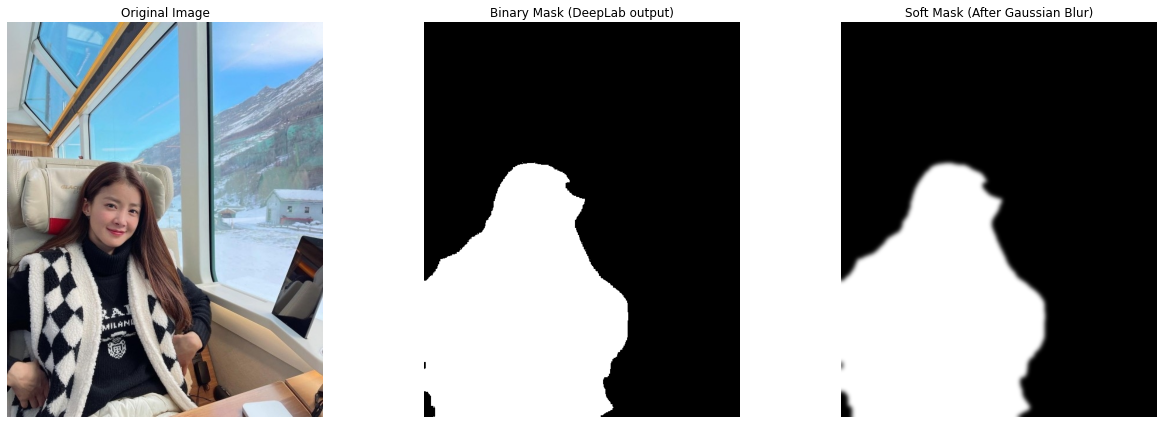

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

# ==================== [1] 정확한 Binary mask 재생성 ====================
seg_color = (128, 128, 192)  # 'person' 클래스 색상 (PixelLib 기준)
seg_map = np.all(output == seg_color, axis=-1)  # Boolean mask
binary_mask = seg_map.astype(np.uint8) * 255

# ==================== [2] Soft mask는 기존에 사용한 img_mask_blur 활용 ====================
# img_mask_blur 는 (H, W, 1) 형태, float32
soft_mask = img_mask_blur.squeeze()  # (H, W) 형태로 정리

# ==================== [3] 시각화 ====================
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].imshow(cv2.cvtColor(img_orig_01_perpost, cv2.COLOR_BGR2RGB))
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(binary_mask, cmap='gray')
axes[1].set_title('Binary Mask (DeepLab output)')
axes[1].axis('off')

axes[2].imshow(soft_mask, cmap='gray')
axes[2].set_title('Soft Mask (After Gaussian Blur)')
axes[2].axis('off')

plt.tight_layout()
plt.show()


##### 회고
- 윤순천
   - 개체를 이 정도로 인식할 수 있다는 것도 놀라운데, 직접해 보니 이미지 인식 성능 발전을 조금이나마 체감할 수 있었다.
   - 더 정확한 이미지 인식을 위해 다른 모델을 적용해 보고 싶었는데, 결과를 도출해 내지 못해 아쉬웠다.
   - 향후 필터 기능의 카메라/갤러리 앱을 만들어 본다면, 개체가 20개만 인식 가능한 DeepLab이 아닌, 다양한 개체 인식이 가능한 모델로 만들어야 겠다는 생각이 든다.